In [1]:
                        # Project Name := House Price Pridiction
# All life cycle in Data science projects
# 1) Data Preprocessing / Data Analysis
# 2) Feature Engineering
# 3) Feature Selection
# 4) Model Building
# 5) model Deployement

In [1]:
# 1) Data Preprocessing / Data Analysis Phase
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_house = pd.read_csv('train.csv')
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# In Data Analysis / Data Preprocessing

In [4]:
# In Data Analysis We will Analze below things
# 1) missing values
# 2) All the numerical variables
# 3) Distribution of Numerical variables
# 4) Categorical variables
# 5) Cardinality of categorical variables
# 6) Outliers
# 7) relationship between independent variable(feature) and the dependent variable(target attribute)
# df_house.isnull().mean()

# # 1) Missing Values

In [3]:

# In this we will check how much percentage the nan value have for each feature
# 1) step 1 - make the list of features having the nan values
features_nan_val = [features for features in df_house.columns if df_house[features].isnull().sum()>1]
# 2)step 2 - Print the missing values and there mean
for feature in features_nan_val:
    print(feature,np.round(df_house[feature].isnull().mean() *100,2), '% missing values')


LotFrontage 17.74 % missing values
Alley 93.77 % missing values
MasVnrType 0.55 % missing values
MasVnrArea 0.55 % missing values
BsmtQual 2.53 % missing values
BsmtCond 2.53 % missing values
BsmtExposure 2.6 % missing values
BsmtFinType1 2.53 % missing values
BsmtFinType2 2.6 % missing values
FireplaceQu 47.26 % missing values
GarageType 5.55 % missing values
GarageYrBlt 5.55 % missing values
GarageFinish 5.55 % missing values
GarageQual 5.55 % missing values
GarageCond 5.55 % missing values
PoolQC 99.52 % missing values
Fence 80.75 % missing values
MiscFeature 96.3 % missing values


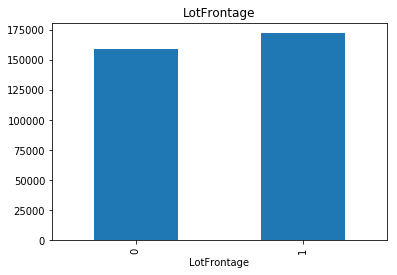

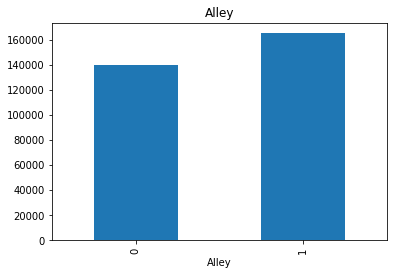

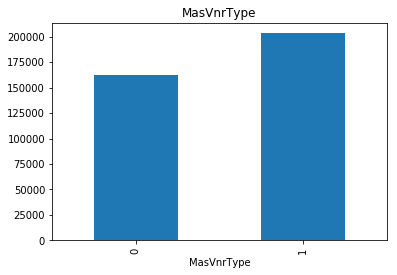

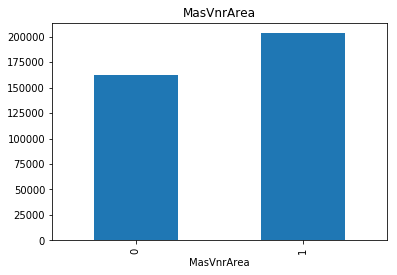

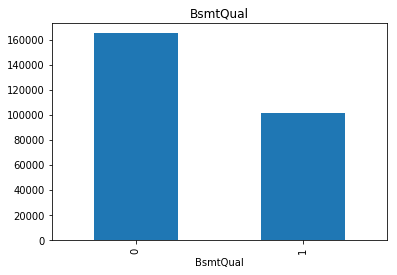

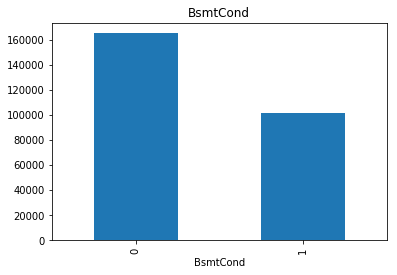

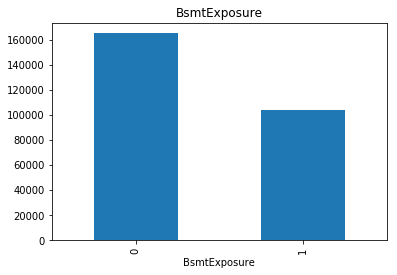

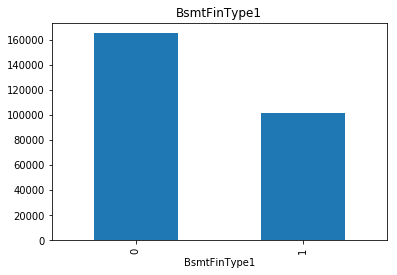

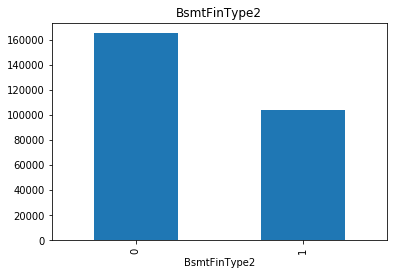

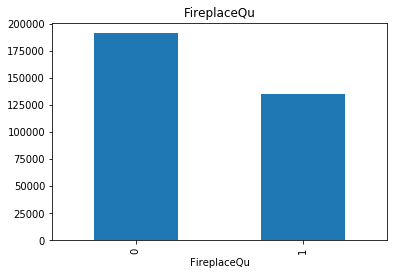

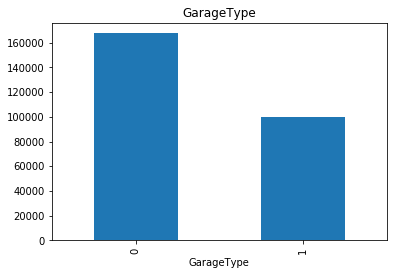

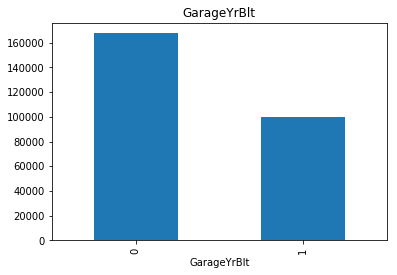

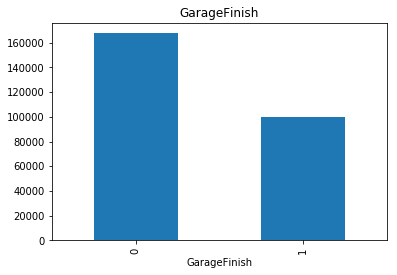

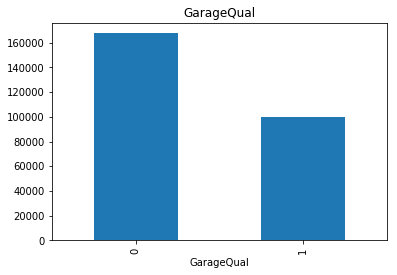

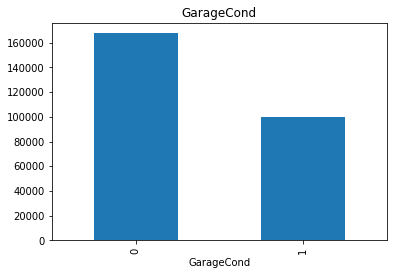

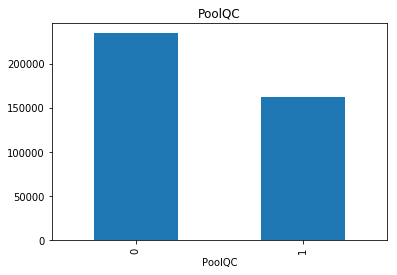

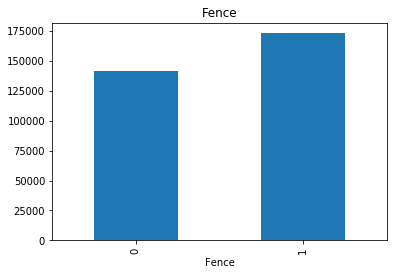

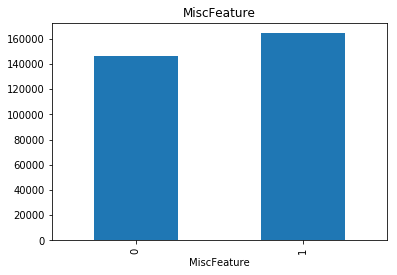

In [6]:
# Since there are missing values we need to find out the relationship between the missing values
# and Target Column
for feat in features_nan_val:
    data = df_house.copy()
    
#     lets takee the new variable and copy data with 1 (i.e. missing) or 0 i.e.(present)
    data[feat] = np.where(data[feat].isnull(),1,0)
    
#     here we calculate the mean with respect to missing value or present .
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.show()
    
    

In [7]:
# here with the relation between nan value and dependent variable is clearly shown.
# so we need to handle the missing nan values in feature engineering


# from the above data set id is not required as it contains unique values 

# # 2) All the numerical variables

In [8]:
features_num_val = [features for features in df_house.columns if df_house[features].dtypes != 'O']

print("length of numerical varibles ",len(features_num_val))

df_house[features_num_val].head()

('length of numerical varibles ', 38)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
#  Now from this numerical variables.
#  we have to check the date variables also which is called as temporal variable(e.g DateTime Variable)

# now find the variables contain the year variables.
features_year = [features for features in features_num_val if 'Yr' in features or 'Year' in features]

features_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5,1,'House price vs year sold')

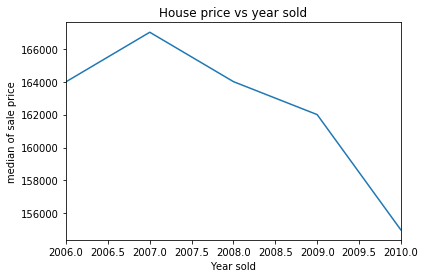

In [10]:
# lets analyize the datetime variable 
df_house.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year sold')
plt.ylabel('median of sale price')
plt.title('House price vs year sold')

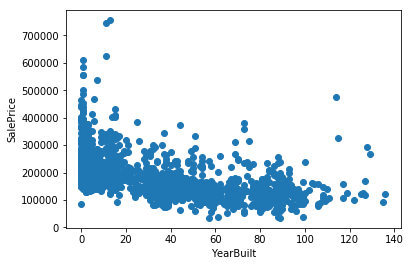

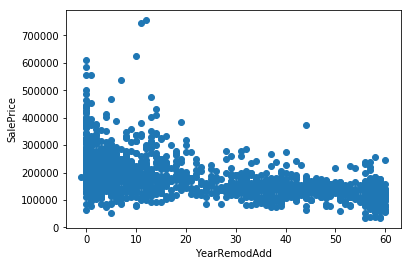

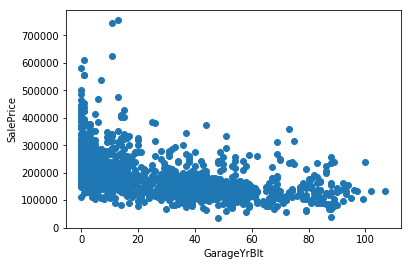

In [11]:
for feature in features_year:
    if feature != 'YrSold':
        data_year = df_house.copy()
        data_year[feature] = data_year['YrSold']-data_year[feature]
        plt.scatter(data_year[feature],data_year['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [12]:
# Now in numerical variables there are two types 
# continuous values and discreate values
discreate_feaature = [feature for feature in features_num_val if len(df_house[feature].unique())<25 and feature not in features_year+['Id']]
len(discreate_feaature)

17

In [13]:
discreate_feaature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [14]:
df_house[discreate_feaature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


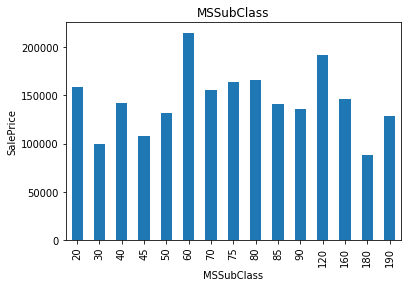

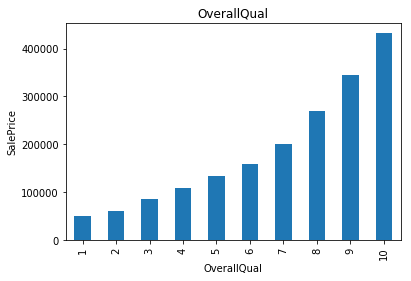

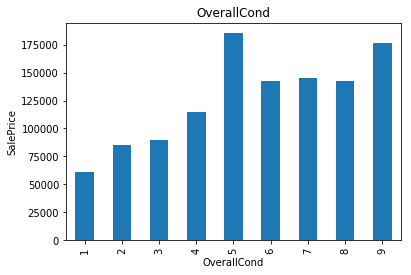

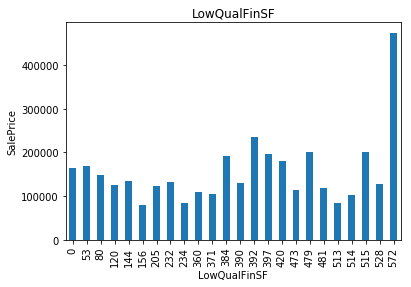

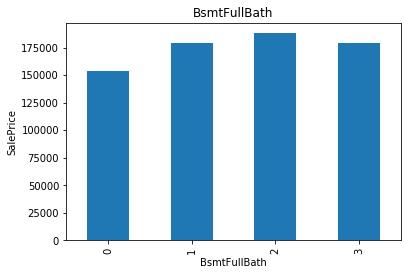

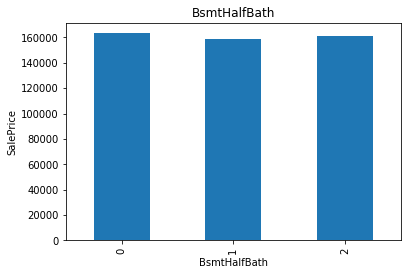

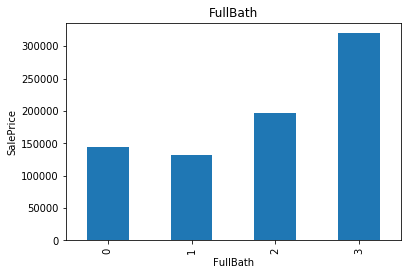

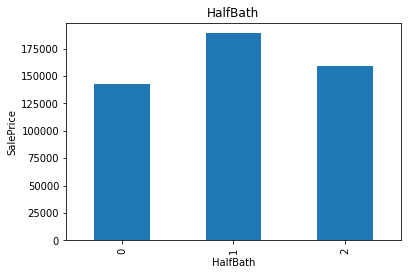

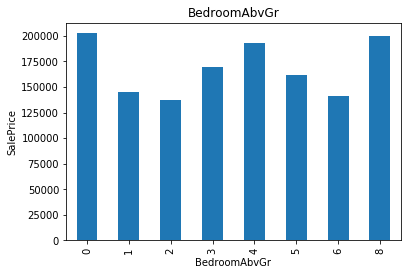

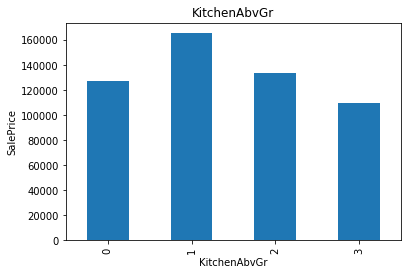

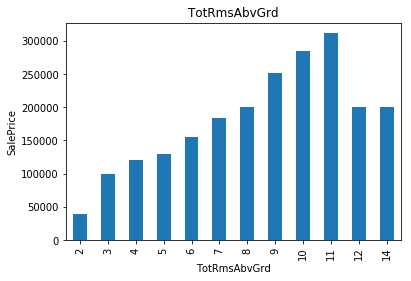

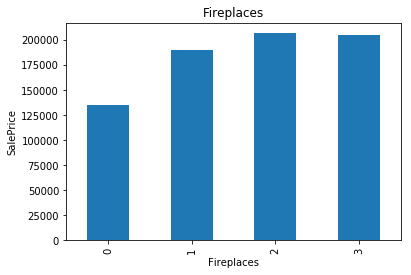

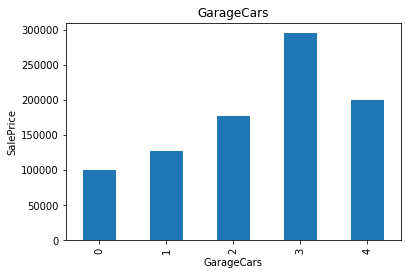

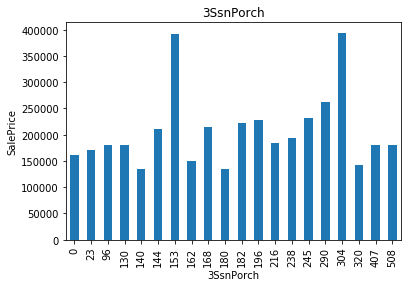

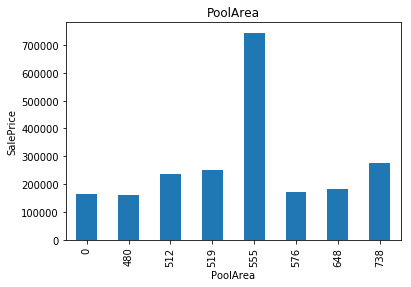

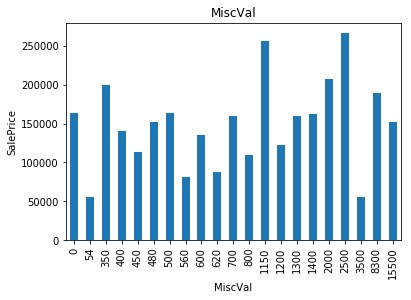

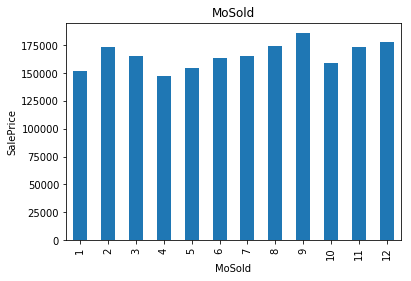

In [15]:
for feature in discreate_feaature:
    data_discreate = df_house.copy()
    data_discreate.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [16]:
continous_data = [feature for feature in features_num_val if feature not in discreate_feaature and feature not in features_year+['Id']]

len(continous_data)

16

In [17]:
continous_data

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [18]:
df_house[continous_data].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


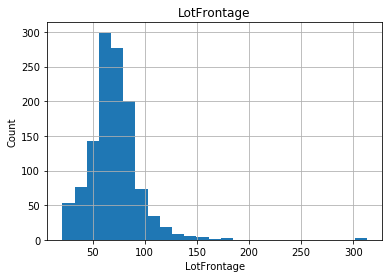

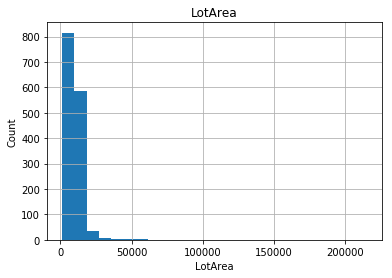

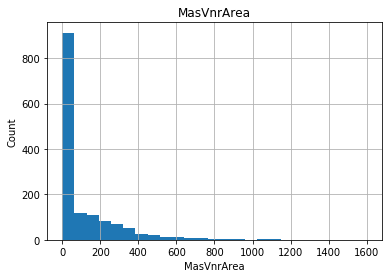

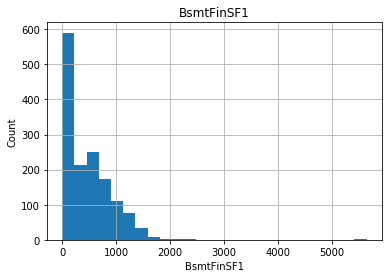

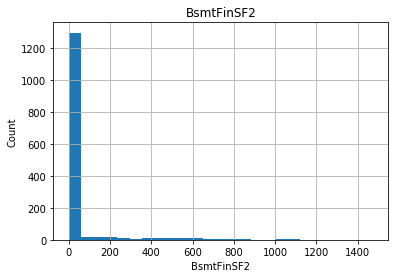

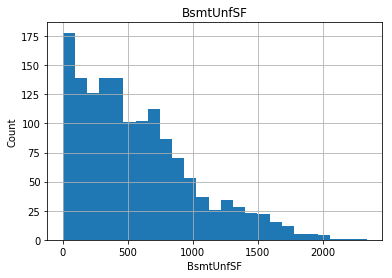

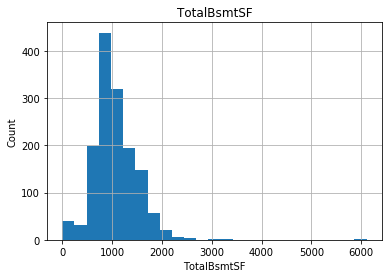

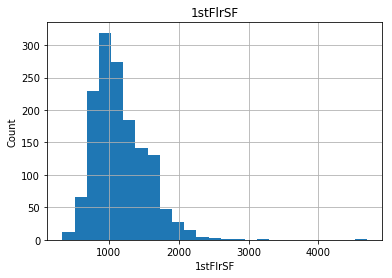

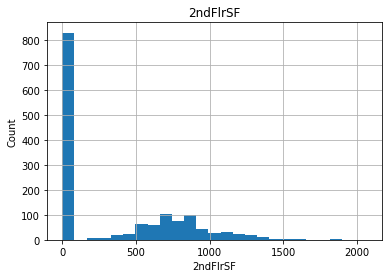

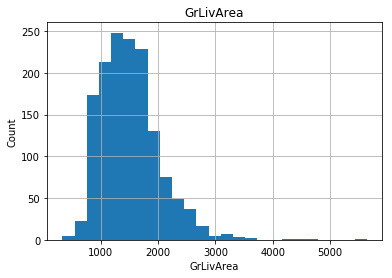

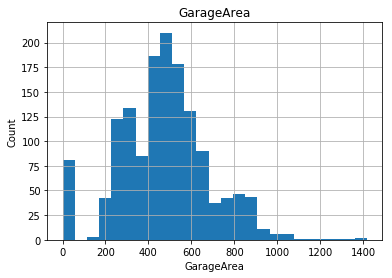

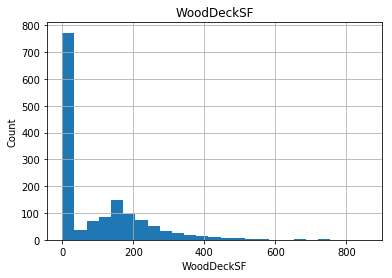

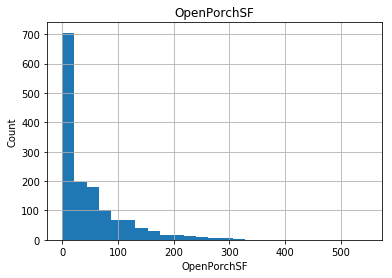

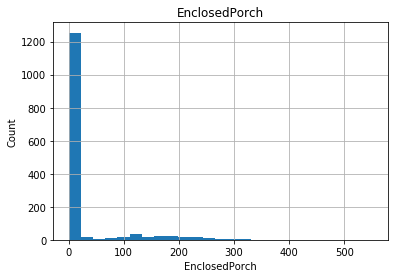

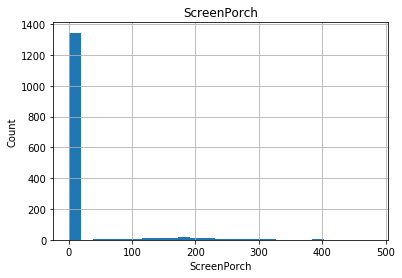

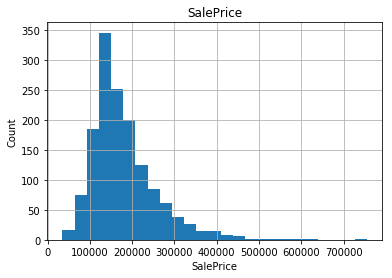

In [19]:
# lets analyse the continous variable for this we need to plot the histogram for continous distribution

for feature in continous_data:
    data_continous = df_house.copy()
    data_continous[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

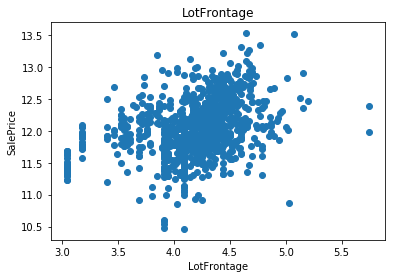

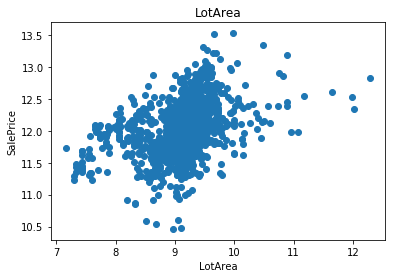

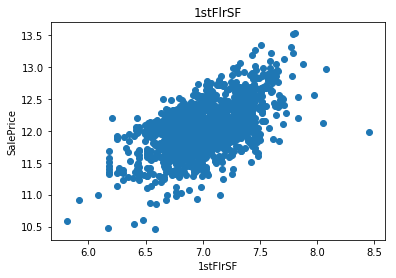

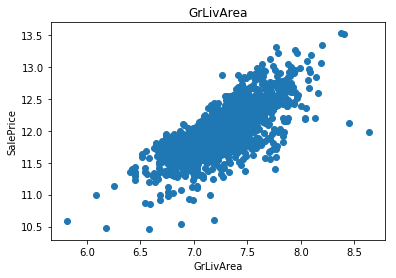

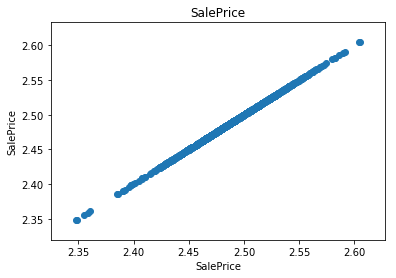

In [20]:
# now converting the continious variables to proper tranformation

for feature in continous_data:
    data = df_house.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

##  Outliers

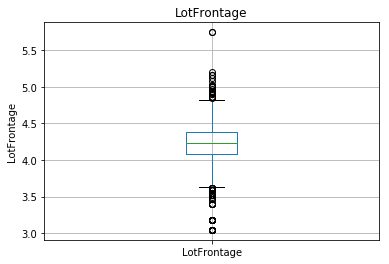

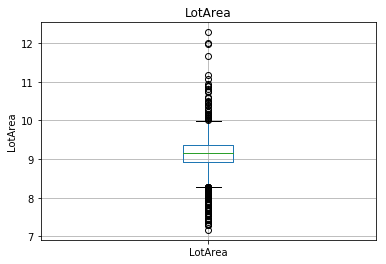

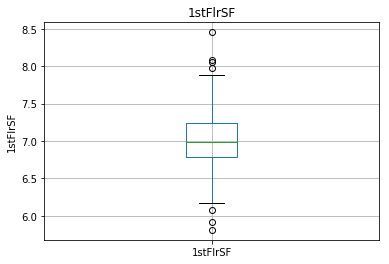

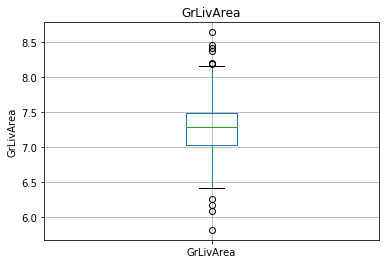

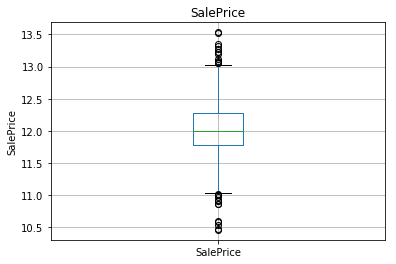

In [21]:
# to find the outliers
for feature in continous_data:
    data = df_house.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [22]:
categorical_feature = [feature for feature in df_house.columns if data[feature].dtypes == 'O']
df_house[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
for feature in categorical_feature:
    print(feature,"unique values",len(df_house[feature].unique()))

('MSZoning', 'unique values', 5)
('Street', 'unique values', 2)
('Alley', 'unique values', 3)
('LotShape', 'unique values', 4)
('LandContour', 'unique values', 4)
('Utilities', 'unique values', 2)
('LotConfig', 'unique values', 5)
('LandSlope', 'unique values', 3)
('Neighborhood', 'unique values', 25)
('Condition1', 'unique values', 9)
('Condition2', 'unique values', 8)
('BldgType', 'unique values', 5)
('HouseStyle', 'unique values', 8)
('RoofStyle', 'unique values', 6)
('RoofMatl', 'unique values', 8)
('Exterior1st', 'unique values', 15)
('Exterior2nd', 'unique values', 16)
('MasVnrType', 'unique values', 5)
('ExterQual', 'unique values', 4)
('ExterCond', 'unique values', 5)
('Foundation', 'unique values', 6)
('BsmtQual', 'unique values', 5)
('BsmtCond', 'unique values', 5)
('BsmtExposure', 'unique values', 5)
('BsmtFinType1', 'unique values', 7)
('BsmtFinType2', 'unique values', 7)
('Heating', 'unique values', 6)
('HeatingQC', 'unique values', 5)
('CentralAir', 'unique values', 2)
('

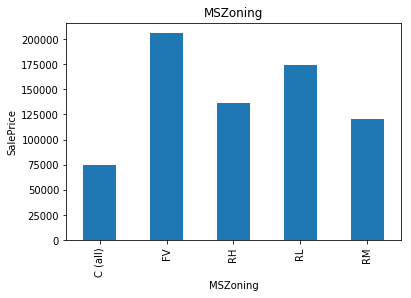

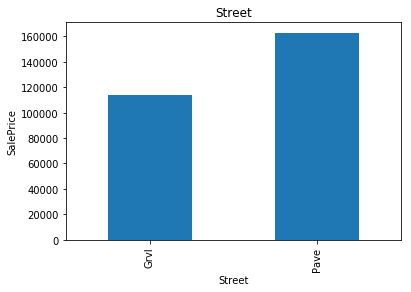

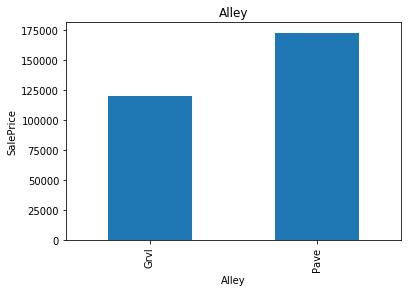

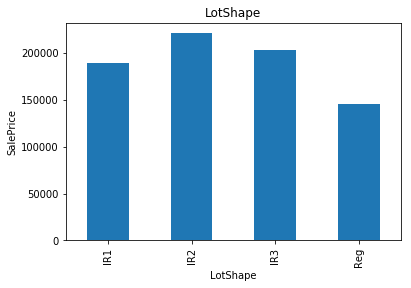

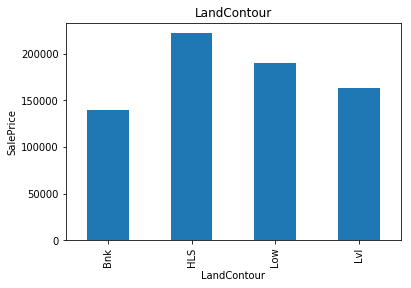

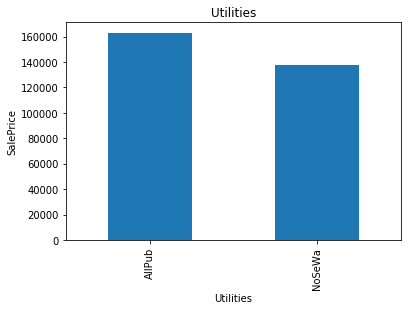

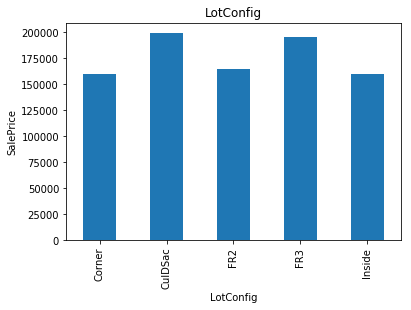

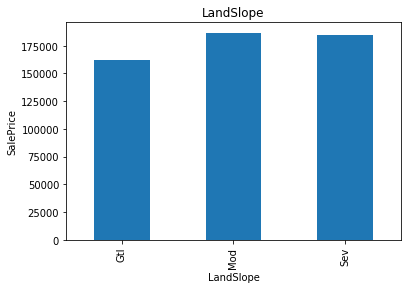

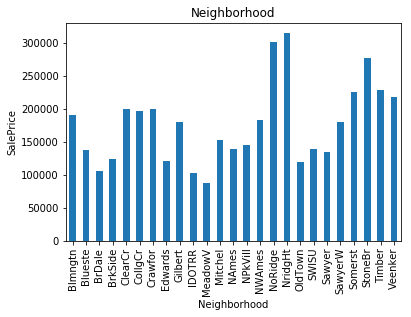

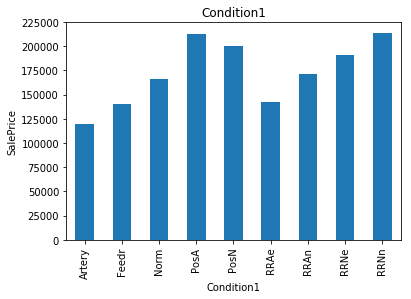

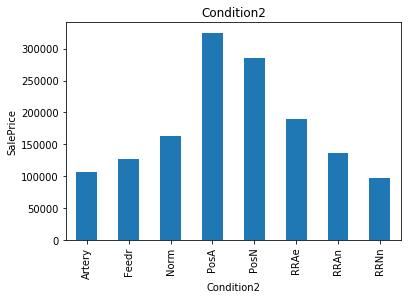

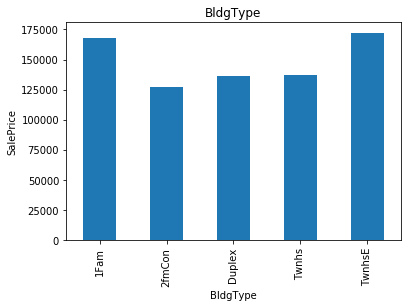

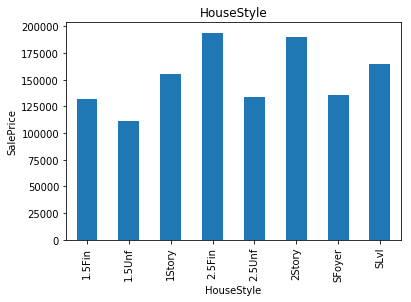

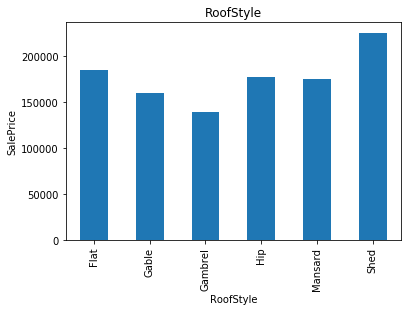

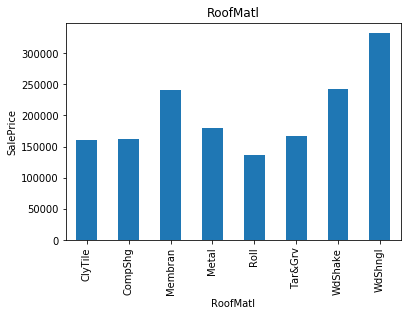

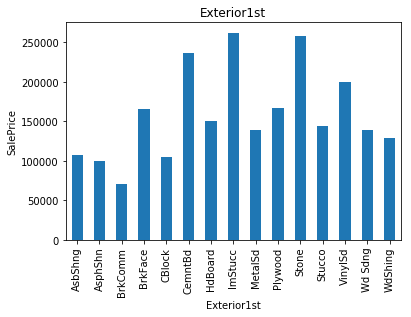

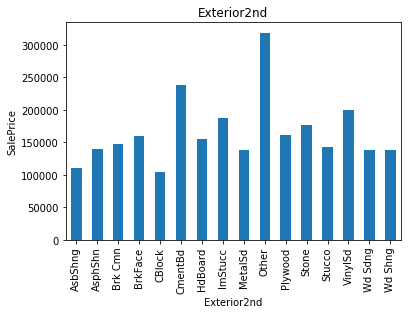

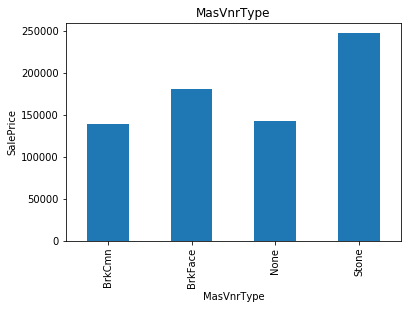

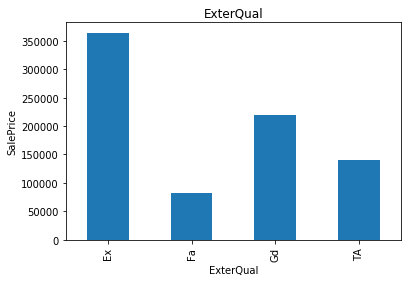

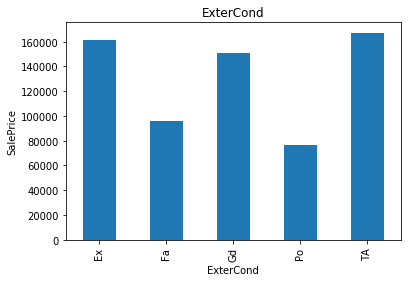

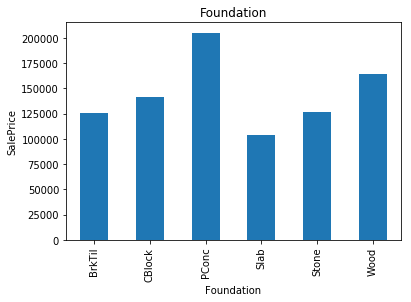

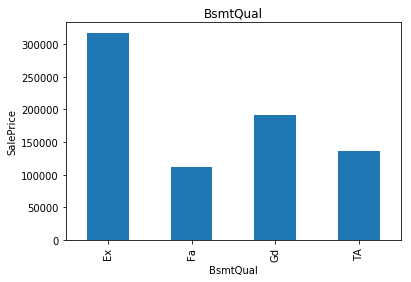

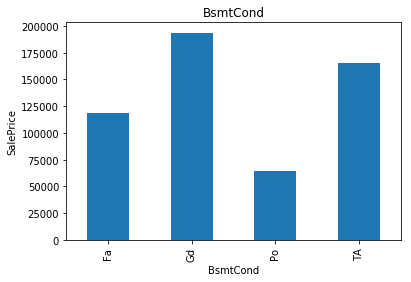

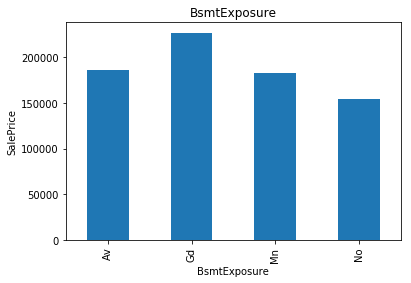

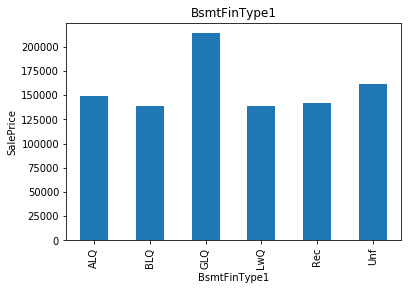

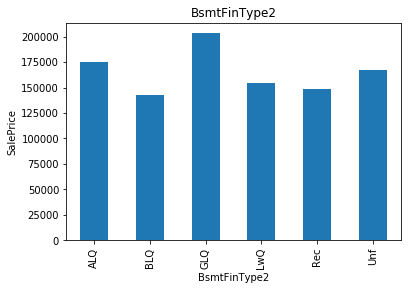

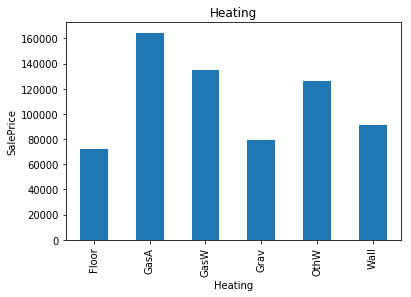

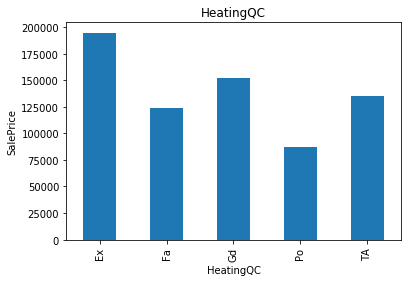

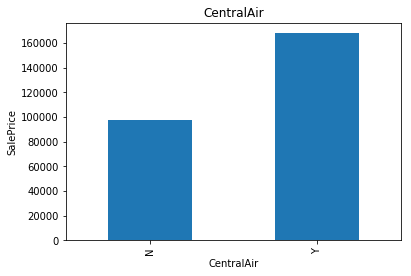

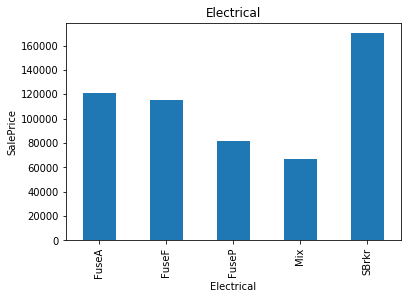

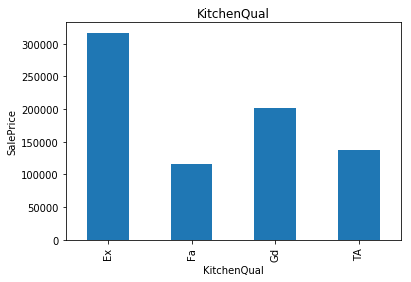

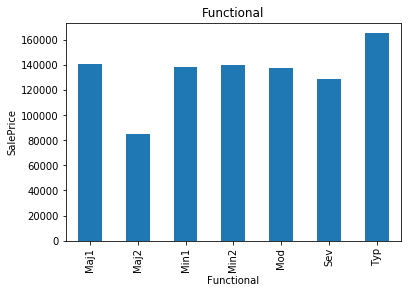

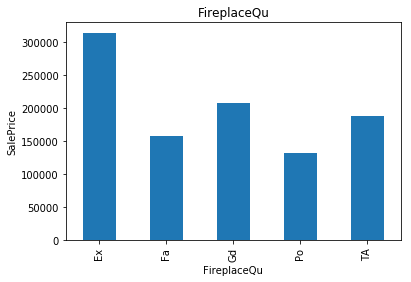

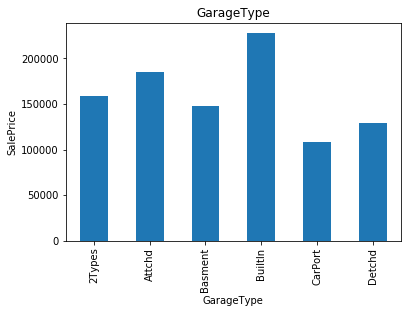

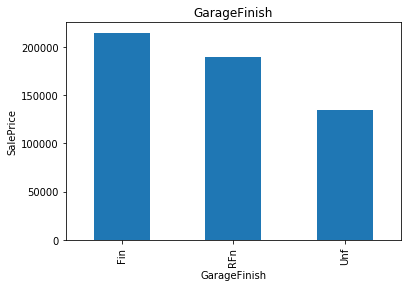

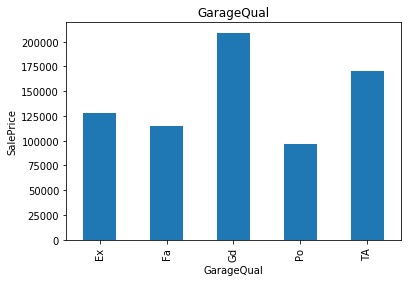

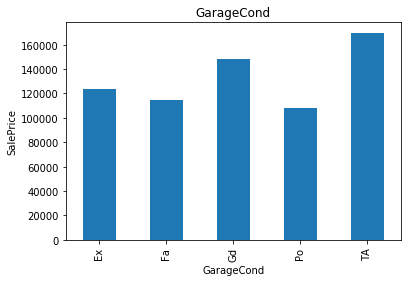

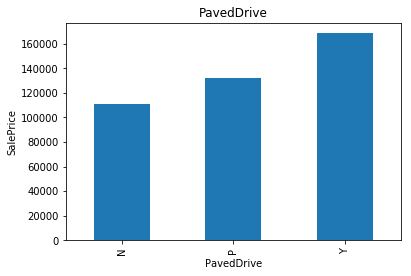

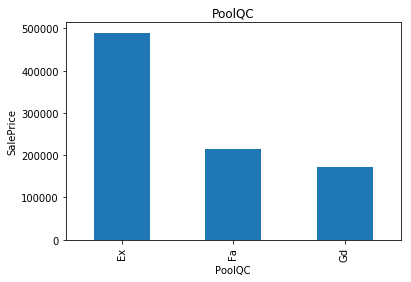

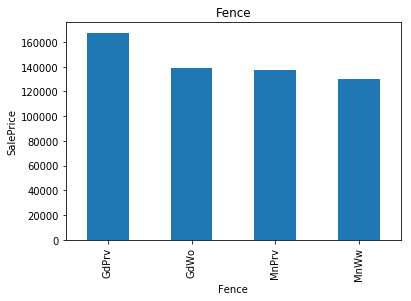

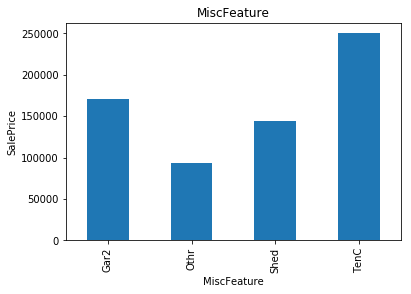

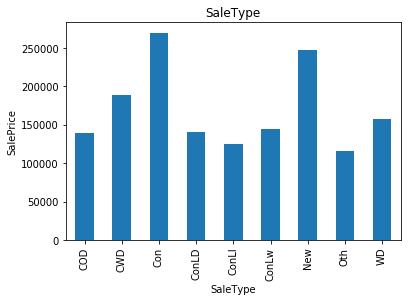

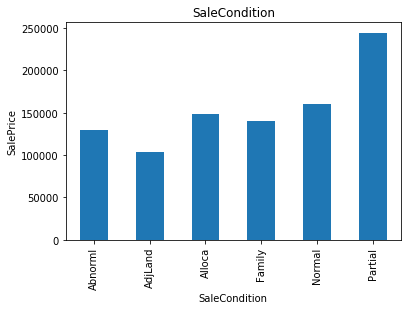

In [24]:
for feature in categorical_feature:
    data = df_house.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()